In [6]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [14]:
#define state
class BMIState(TypedDict):
    
    weigth_kg: float
    height_m: float
    bmi: float
    category: str

In [8]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight_kg = state['weigth_kg']
    height_m = state['height_m']
    bmi = weight_kg / (height_m ** 2)
    state['bmi'] = round(bmi, 2)
    return state

In [15]:
def level_bmi(state: BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        category = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        category = 'Normal weight'
    elif 25 <= bmi < 29.9:
        category = 'Overweight'
    else:
        category = 'Obesity'
    state['category'] = category
    return state

In [16]:
# define graph
bmi_graph = StateGraph(BMIState)

# add node
bmi_graph.add_node('calculate_bmi',calculate_bmi)
bmi_graph.add_node('level_bmi',level_bmi)

# add edges to your graph
bmi_graph.add_edge(START, 'calculate_bmi')
bmi_graph.add_edge('calculate_bmi', 'level_bmi')
bmi_graph.add_edge('level_bmi', END)


#compile graph
workflow = bmi_graph.compile()


In [17]:
# execute graph
initial_state = {'weigth_kg': 90,'height_m': 1.82}
final_state = workflow.invoke(initial_state)

print(final_state)  


{'weigth_kg': 90, 'height_m': 1.82, 'bmi': 27.17, 'category': 'Overweight'}


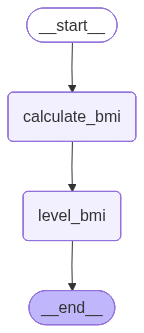

In [18]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())
